### Driven Data Pump it Up Challenge:

In [1]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
#import os
#os.environ["PROJ_LIB"] = "C:\\Users\\rtalebiz\\AppData\\Local\\Continuum\\anaconda3\\Library\\share"
#from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [2]:
#Reading the df files and assigning them to variables - we have 2 csv files
training_label = pd.read_csv('data/training set labels.csv')
training_values_df = pd.read_csv('data/training set values.csv')

In [3]:
# Merge training_values_df and training_label dfs to have one df
train_df = pd.merge(training_values_df, training_label, on = "id")

In [4]:
# Deleting training_label df
del training_label

In [5]:
# Creating a copy of train df so making changes would not alter the initial dataset
df = train_df.copy()

#### Let's look at our data using .info(), .shape and .head() methods

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [7]:
df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

### We notice that some of our features like *(funder, installer, subvillage, public_meeting, scheme_management, scheme_name and permit)* have missing values. We need to look at these features and decide if they play a vitale role in predicting which pump is likely to stop working. Also, some of these features have duplicate data like *funder and installer* so I would likely drop one of them.

In [8]:
df.shape

(59400, 41)

#### Our dataset has 59,400 datapoints and 41 features. Now let's look at a few datapoints using .head()

In [9]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


### I'll be looking at some of these features and dropping the ones with duplicate data as well as figuring out a way to fill all the NaNs and/or 0s

#### Now let's look at the amount of each functional type pumps in our dataset

In [10]:
# The count of each fuctional type of the pumps in status_group so that we will understand the functional scenario 
# of the pump status
print('Count of each functional type:' + '\n' + str(df.status_group.value_counts()))
print('\n' + 'Percent of each functional type:' + '\n' + str(df.status_group.value_counts(normalize=True) * 100))

Count of each functional type:
functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

Percent of each functional type:
functional                 54.308081
non functional             38.424242
functional needs repair     7.267677
Name: status_group, dtype: float64


#### By the above figures, we can roughly estimate that there is 54.31% chance that if we take a random pump in the data to be a functional pump.

### Now let's separate our Numerical and Categorical features and visualize some of the most sensitive columns

In [11]:
sensitive_num_features = [
    'amount_tsh',
    'gps_height',
    'longitude',
    'latitude',
    'population',
    'construction_year'
]

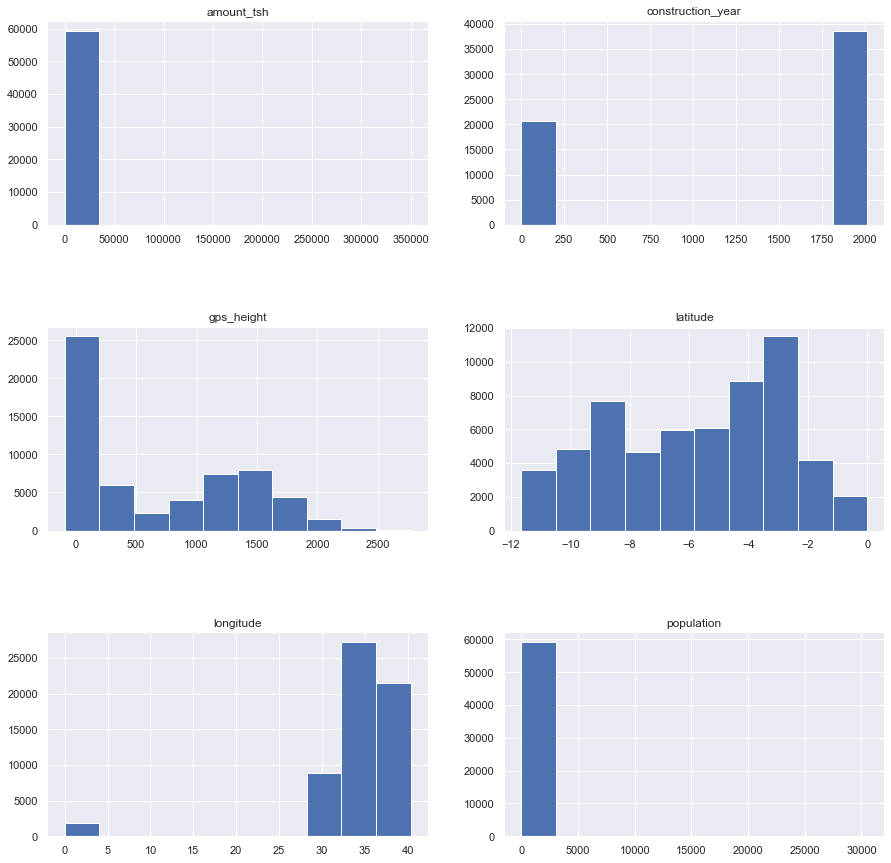

In [12]:
sns.set()
df.loc[:,sensitive_num_features].hist()
fig = plt.gcf()
fig.set_size_inches(15,15)
fig.subplots_adjust(wspace=0.2, hspace=0.5)

### Let's look at the Numerical values

In [13]:
#df[df['construction_year'] == 0]

In [14]:
df['construction_year'].value_counts(normalize=True) * 100

0       34.863636
2010     4.452862
2008     4.398990
2009     4.264310
2000     3.520202
2007     2.671717
2006     2.476431
2003     2.164983
2011     2.114478
2004     1.890572
2012     1.824916
2002     1.809764
1978     1.745791
1995     1.707071
2005     1.702020
1999     1.648148
1998     1.626263
1990     1.606061
1985     1.590909
1980     1.365320
1996     1.365320
1984     1.311448
1982     1.252525
1994     1.242424
1972     1.191919
1974     1.138047
1997     1.084175
1992     1.077441
1993     1.023569
2001     0.909091
1988     0.877104
1983     0.821549
1975     0.735690
1986     0.730640
1976     0.696970
1970     0.691919
1991     0.545455
1989     0.531987
1987     0.508418
1981     0.400673
1977     0.340067
1979     0.323232
1973     0.309764
2013     0.296296
1971     0.244108
1960     0.171717
1967     0.148148
1963     0.143098
1968     0.129630
1969     0.099327
1964     0.067340
1962     0.050505
1961     0.035354
1965     0.031987
1966     0.028620
Name: cons

In [15]:
#df[df['population'] == 0]

In [16]:
df['population'].value_counts(normalize=True) * 100

0       35.994949
1       11.826599
200      3.265993
150      3.185185
250      2.829966
300      2.484848
100      1.929293
50       1.917508
500      1.698653
350      1.659933
120      1.542088
400      1.304714
60       1.188552
30       1.053872
40       0.929293
80       0.897306
450      0.840067
20       0.777778
600      0.737374
230      0.653199
75       0.486532
1000     0.468013
800      0.452862
90       0.446128
130      0.444444
25       0.429293
320      0.419192
35       0.412458
360      0.373737
140      0.361953
          ...    
8848     0.001684
628      0.001684
4520     0.001684
468      0.001684
693      0.001684
725      0.001684
789      0.001684
821      0.001684
5300     0.001684
3127     0.001684
2345     0.001684
3031     0.001684
886      0.001684
392      0.001684
424      0.001684
2807     0.001684
726      0.001684
694      0.001684
2569     0.001684
4788     0.001684
662      0.001684
4660     0.001684
406      0.001684
1032     0.001684
1160     0

In [17]:
df['amount_tsh'].value_counts(normalize=True) * 100

0.00         70.099327
500.00        5.222222
50.00         4.161616
1000.00       2.505051
20.00         2.462963
200.00        2.053872
100.00        1.373737
10.00         1.356902
30.00         1.250842
2000.00       1.185185
250.00        0.957912
300.00        0.937710
5000.00       0.757576
5.00          0.632997
25.00         0.599327
3000.00       0.562290
1200.00       0.449495
1500.00       0.331650
6.00          0.319865
600.00        0.296296
4000.00       0.262626
2400.00       0.244108
2500.00       0.234007
6000.00       0.210438
7.00          0.116162
8000.00       0.102694
750.00        0.099327
40.00         0.099327
10000.00      0.095960
12000.00      0.085859
               ...    
16000.00      0.003367
16300.00      0.003367
800.00        0.003367
11000.00      0.003367
590.00        0.003367
520.00        0.003367
26000.00      0.003367
13000.00      0.003367
9.00          0.001684
170000.00     0.001684
200000.00     0.001684
900.00        0.001684
0.25       

### We see above that we have 70% *'amount_tsh'* == 0 (amount water available to waterpoint) and this doesn't make sense when the *'quantity'* is not 'dry'. I'll assume that 0 value in *'amount_tsh'* means we are missing values in this feature and we need to handle it.

In [18]:
#dropping this feature because it has too many missing values. 70% 0s.
#df.drop('amount_tsh', axis=1, inplace=True)

In [19]:
df['gps_height'].value_counts(normalize=True) * 100

 0       34.407407
-15       0.101010
-16       0.092593
-13       0.092593
-20       0.087542
 1290     0.087542
-14       0.085859
 303      0.085859
-18       0.082492
-19       0.079125
 1269     0.077441
 1295     0.077441
 1304     0.075758
-23       0.075758
 280      0.074074
 1538     0.074074
 1286     0.074074
-8        0.074074
-17       0.074074
 1332     0.072391
 320      0.072391
 1317     0.070707
 1293     0.070707
 1319     0.070707
 1359     0.070707
 1264     0.070707
 1288     0.070707
 1401     0.070707
 1303     0.070707
-27       0.070707
           ...    
 2506     0.001684
 2023     0.001684
-53       0.001684
 2364     0.001684
 2332     0.001684
 2402     0.001684
 2236     0.001684
 2420     0.001684
 2291     0.001684
 2407     0.001684
 2080     0.001684
 2250     0.001684
 591      0.001684
 2378     0.001684
 2535     0.001684
 2614     0.001684
 2484     0.001684
 2450     0.001684
 2072     0.001684
 2286     0.001684
 2567     0.001684
 2322     0.

In [20]:
df['longitude'].value_counts(normalize=True) * 100

0.000000     3.050505
37.540901    0.003367
33.010510    0.003367
39.093484    0.003367
32.972719    0.003367
33.006275    0.003367
39.103950    0.003367
37.542785    0.003367
36.802490    0.003367
39.098374    0.003367
33.090347    0.003367
33.005032    0.003367
32.978062    0.003367
39.088875    0.003367
31.619530    0.003367
39.093095    0.003367
39.105307    0.003367
32.936689    0.003367
32.987511    0.003367
39.090880    0.003367
37.314250    0.003367
32.984790    0.003367
39.091434    0.003367
37.274352    0.003367
32.919861    0.003367
37.530515    0.003367
32.955597    0.003367
39.098514    0.003367
32.988560    0.003367
32.987670    0.003367
               ...   
36.831815    0.001684
31.530352    0.001684
35.455622    0.001684
37.672581    0.001684
29.964104    0.001684
34.862237    0.001684
37.663466    0.001684
37.128824    0.001684
38.766058    0.001684
38.710520    0.001684
40.117029    0.001684
34.672962    0.001684
39.433604    0.001684
35.901580    0.001684
37.532216 

#### As we can see above, we have 3% counts of the value 0 for longitude which is not correct according to the map of Tanzania. [Map of Tanzania with latitude and longitude](https://www.worldatlas.com/img/areamap/44fb0cbaa5eb7ba2770b00485a23d97a.gif). You can also find more information about Tanzania using this [link](https://www.worldatlas.com/webimage/countrys/africa/tz.htm)

In [21]:
df['latitude'].value_counts(normalize=True) * 100

-2.000000e-08    3.050505
-6.985842e+00    0.003367
-3.797579e+00    0.003367
-6.981884e+00    0.003367
-7.104625e+00    0.003367
-7.056923e+00    0.003367
-7.175174e+00    0.003367
-6.990731e+00    0.003367
-6.978755e+00    0.003367
-6.994704e+00    0.003367
-2.494546e+00    0.003367
-6.964258e+00    0.003367
-2.506590e+00    0.003367
-6.990549e+00    0.003367
-2.485227e+00    0.003367
-2.494353e+00    0.003367
-6.962475e+00    0.003367
-6.989456e+00    0.003367
-6.957328e+00    0.003367
-6.958716e+00    0.003367
-6.992611e+00    0.003367
-6.991294e+00    0.003367
-7.177155e+00    0.003367
-2.501627e+00    0.003367
-1.793342e+00    0.003367
-7.102004e+00    0.003367
-2.467137e+00    0.003367
-2.516619e+00    0.003367
-7.095131e+00    0.003367
-6.981326e+00    0.003367
                   ...   
-1.820702e+00    0.001684
-3.849252e+00    0.001684
-4.624770e+00    0.001684
-6.405513e+00    0.001684
-1.530104e+00    0.001684
-3.482213e+00    0.001684
-6.345435e+00    0.001684
-3.914628e+0

In [22]:
df['date_recorded'] = pd.to_datetime(df['date_recorded'])
#df['construction_year'] = df.construction_year.map(lambda x: np.nan if x == 0 else x)

In [23]:
#recalculate operation year
#df['operation_year'] = df.date_recorded.dt.year - df.construction_year

In [24]:
df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [25]:
# We can see that there are 41639 0's in amount_tsh column. Since these 0's might cause some 
#issues later, we need to change them to NaN values and then replace the NaN values 
#with transform("mean") and transform("median") - This is also true for population and gps_height
df['amount_tsh'].replace(0.0, np.nan, inplace=True)
df['gps_height'].replace(0.0, np.nan, inplace=True)
df['population'].replace(0.0, np.nan, inplace=True)
df['longitude'].replace(0.0, np.nan, inplace=True)
df['construction_year'].replace(0.0, np.nan, inplace=True)
#df['pupm_age'].replace('0', np.nan, inplace=True)

In [26]:
df['amount_tsh'].fillna(df.groupby(['region', 'district_code'])['amount_tsh'].transform("median"), inplace=True)
df['amount_tsh'].fillna(df.groupby(['region'])['amount_tsh'].transform("median"), inplace=True)
df['amount_tsh'].fillna(df['amount_tsh'].median(), inplace=True)
df['gps_height'].fillna(df.groupby(['region', 'district_code'])['gps_height'].transform("mean"), inplace=True)
df['gps_height'].fillna(df.groupby(['region'])['gps_height'].transform("mean"), inplace=True)
df['gps_height'].fillna(df['gps_height'].mean(), inplace=True)
df['population'].fillna(df.groupby(['region', 'district_code'])['population'].transform("median"), inplace=True)
df['population'].fillna(df.groupby(['region'])['population'].transform("median"), inplace=True)
df['population'].fillna(df['population'].median(), inplace=True)
df['longitude'].fillna(df.groupby(['region', 'district_code'])['longitude'].transform("mean"), inplace=True)
df['longitude'].fillna(df.groupby(['region'])['longitude'].transform("mean"), inplace=True)
df['construction_year'].fillna(df['construction_year'].median(), inplace=True)

### Let's start to remove unnecessary features

In [27]:
list(df.select_dtypes(object))

['funder',
 'installer',
 'wpt_name',
 'basin',
 'subvillage',
 'region',
 'lga',
 'ward',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'status_group']

In [28]:
#df['funder'].unique()

In [29]:
#df['lga'].unique()

In [30]:
df['recorded_by'].unique()

array(['GeoData Consultants Ltd'], dtype=object)

In [31]:
# Recorded_by has no unique values so let's drop this feature
#df.drop('recorded_by', axis=1, inplace=True)

In [32]:
# Also dropping 'public_meeting' and 'permit' features because they are not sensitive
#df.drop('public_meeting', axis=1, inplace=True)
#df.drop('permit', axis=1, inplace=True)

### For every important categorical response, we convert the levels to lower case, in case there is a random capitalization

In [33]:
#df.installer = df.installer.str.lower()
df.funder = df.funder.str.lower()
#df.wpt_name = df.wpt_name.str.lower()
df.basin = df.basin.str.lower()
#df.subvillage = df.subvillage.str.lower()
df.region = df.region.str.lower()
df.lga = df.lga.str.lower()
#df.ward = df.ward.str.lower()
df.management = df.management.str.lower()
#df.management_group = df.management_group.str.lower()
df.scheme_management = df.scheme_management.str.lower()

### Now let's look at categorical features that have similar information

In [34]:
df.groupby(['installer', 'funder']).size()

installer             funder                        
-                     government of tanzania              2
                      kalebejo parish                     1
0                     0                                 777
A.D.B                 hesawa                              1
AAR                   aar                                 4
ABASIA                abasia                             29
ABD                   abd                                 1
ABDALA                abdala                              1
ABDUL                 abdul                               1
AC                    action aid                          2
ACORD                 acord                               3
ACRA                  acra                               46
                      eu/acra                            18
                      rc                                 39
                      rc church                         108
                      roman catholic           

In [35]:
#df.drop('installer',axis=1,inplace=True)

In [36]:
#start with extraction_type, extraction_type_group, and extraction_type_class
df.groupby(['extraction_type_group', 'extraction_type_class','extraction_type']).size()

extraction_type_group  extraction_type_class  extraction_type          
afridev                handpump               afridev                       1770
gravity                gravity                gravity                      26780
india mark ii          handpump               india mark ii                 2400
india mark iii         handpump               india mark iii                  98
mono                   motorpump              mono                          2865
nira/tanira            handpump               nira/tanira                   8154
other                  other                  other                         6430
other handpump         handpump               other - mkulima/shinyanga        2
                                              other - play pump               85
                                              other - swn 81                 229
                                              walimi                          48
other motorpump        motorpump     

In [37]:
#df.drop(['extraction_type_group', 'extraction_type_class'],axis=1,inplace=True)

In [38]:
df.groupby(['lga', 'ward']).size()

lga           ward         
arusha rural  Bangata           33
              Bwawani           37
              Ilkiding'a        86
              Kimnyaki          79
              Kiranyi          115
              Kisongo           33
              Mateves           22
              Mlangarini        92
              Moivo             44
              Moshono           44
              Murieti           29
              Musa              29
              Mwandeti          17
              Nduruma          205
              Oldonyosambu      77
              Oljoro             8
              Olkokola         133
              Oltroto           75
              Oltrumet          52
              Sokoni II         42
arusha urban  Baraa              2
              Daraja Mbili       3
              Elerai            11
              Engutoto           1
              Kaloleni           5
              Kimandolu          2
              Lemara             4
              Levolosi     

In [39]:
#df.drop('ward',axis=1,inplace=True)

In [40]:
df.groupby(['management', 'management_group']).size()

management        management_group
company           commercial            685
other             other                 844
other - school    other                  99
parastatal        parastatal           1768
private operator  commercial           1971
trust             commercial             78
unknown           unknown               561
vwc               user-group          40507
water authority   commercial            904
water board       user-group           2933
wua               user-group           2535
wug               user-group           6515
dtype: int64

In [41]:
#df.drop('management_group',axis=1,inplace=True)

In [42]:
df.groupby(['scheme_management', 'scheme_name']).size()

scheme_management  scheme_name                              
company            BFFS                                           1
                   Bagamoyo Wate                                 60
                   Bagamoyo wate                                210
                   Borehole                                       1
                   Borehole drilling project                      1
                   Bulamba piped scheme                           2
                   Burieni water supply                           1
                   Doe water supply                               3
                   EKTM 2 water  supply                           1
                   EKTM 2 water suply                            25
                   EKTM 2 water supply                            9
                   EKTM 3 water supply                           51
                   Fufulamsuri water supply                       1
                   GRUMETI                             

In [43]:
#df.drop('scheme_name',axis=1,inplace=True)

In [44]:
df.groupby(['payment', 'payment_type']).size()

payment                payment_type
never pay              never pay       25348
other                  other            1054
pay annually           annually         3642
pay monthly            monthly          8300
pay per bucket         per bucket       8985
pay when scheme fails  on failure       3914
unknown                unknown          8157
dtype: int64

In [45]:
#df.drop('payment',axis=1,inplace=True)

In [46]:
df.groupby(['water_quality', 'quality_group']).size()

water_quality       quality_group
coloured            colored            490
fluoride            fluoride           200
fluoride abandoned  fluoride            17
milky               milky              804
salty               salty             4856
salty abandoned     salty              339
soft                good             50818
unknown             unknown           1876
dtype: int64

In [47]:
#df.drop('quality_group',axis=1,inplace=True)

In [48]:
df.groupby(['quantity', 'quantity_group']).size()

quantity      quantity_group
dry           dry                6246
enough        enough            33186
insufficient  insufficient      15129
seasonal      seasonal           4050
unknown       unknown             789
dtype: int64

In [49]:
#df.drop('quantity_group',axis=1,inplace=True)

In [50]:
df.groupby(['source', 'source_type', 'source_class']).size()

source                source_type           source_class
dam                   dam                   surface           656
hand dtw              borehole              groundwater       874
lake                  river/lake            surface           765
machine dbh           borehole              groundwater     11075
other                 other                 unknown           212
rainwater harvesting  rainwater harvesting  surface          2295
river                 river/lake            surface          9612
shallow well          shallow well          groundwater     16824
spring                spring                groundwater     17021
unknown               other                 unknown            66
dtype: int64

In [51]:
#df.drop('source_type',axis=1,inplace=True)

In [52]:
df.groupby(['waterpoint_type', 'waterpoint_type_group']).size()

waterpoint_type              waterpoint_type_group
cattle trough                cattle trough              116
communal standpipe           communal standpipe       28522
communal standpipe multiple  communal standpipe        6103
dam                          dam                          7
hand pump                    hand pump                17488
improved spring              improved spring            784
other                        other                     6380
dtype: int64

In [53]:
#df.drop('waterpoint_type_group',axis=1,inplace=True)

In [54]:
# region and region_code are representing the same thing
#f.drop('region', axis=1, inplace=True)

In [55]:
df['funder'].fillna("other", inplace=True)
df['scheme_management'].fillna("other", inplace=True)

In [56]:
#df['operation_year'] = df.date_recorded.dt.year - df.construction_year

In [57]:
df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                       0
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management            0
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [58]:
df['pump_age'] = df.date_recorded.dt.year - df.construction_year
df[df['pump_age']==0][['construction_year','date_recorded', 'status_group']]#, 'date_recorded', 'construction_year']].head(10)

,construction_year,date_recorded,status_group
10,2011.0,2011-02-20,functional
42,2011.0,2011-07-07,functional
402,2011.0,2011-07-24,functional
591,2011.0,2011-03-24,functional
593,2013.0,2013-06-03,non functional
765,2011.0,2011-03-21,functional
784,2011.0,2011-02-23,functional
833,2011.0,2011-07-30,functional
901,2011.0,2011-08-25,functional
907,2011.0,2011-03-12,functional


In [59]:
garbage_features = ['permit', 'public_meeting','installer','ward','wpt_name','num_private',
                    'subvillage','region_code','recorded_by', 'management_group', 'extraction_type_group',
                    'scheme_name', 'payment', 'quality_group', 'quantity_group',
                    'source_type', 'waterpoint_type_group']#,'date_recorded', 'construction_year']

df.drop(garbage_features,axis=1,inplace=True)

In [60]:
df.isnull().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
longitude                0
latitude                 0
basin                    0
region                   0
district_code            0
lga                      0
population               0
scheme_management        0
construction_year        0
extraction_type          0
extraction_type_class    0
management               0
payment_type             0
water_quality            0
quantity                 0
source                   0
source_class             0
waterpoint_type          0
status_group             0
pump_age                 0
dtype: int64

In [61]:
len(df.columns)

25

In [62]:
#plt.figure(figsize=(15,7))
#_ = sns.countplot(data=df,x='region',hue='status_group')
#_.set_xticklabels(_.get_xticklabels(),rotation=90)
#plt.legend(bbox_to_anchor=(1,1), loc=2)

In [63]:
#plt.figure(figsize=(15,7))
#sns.countplot(data=df,x='basin',hue='status_group')
#plt.legend(bbox_to_anchor=(1,1), loc=2)

functional                 54.308081
non functional             38.424242
functional needs repair     7.267677
Name: status_group, dtype: float64

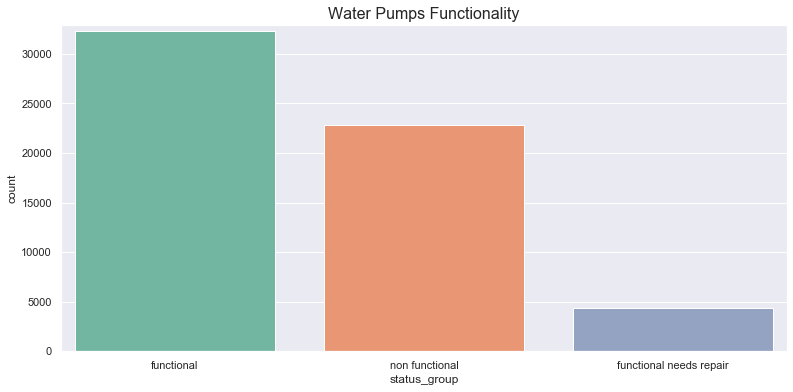

In [64]:
# Let's look at countplot of status_group that we need to eventually predict
plt.figure(figsize=(13,6))
sns.countplot(data=df, x='status_group', palette='Set2')
plt.title('Water Pumps Functionality',fontsize=16)
plt.margins(0.02)
df.status_group.value_counts(normalize=True) * 100

### Now let's compare the *status_group* feature with other Categorical features to see if we can find a trend

soft                  85.552189
salty                  8.175084
unknown                3.158249
milky                  1.353535
coloured               0.824916
salty abandoned        0.570707
fluoride               0.336700
fluoride abandoned     0.028620
Name: water_quality, dtype: float64

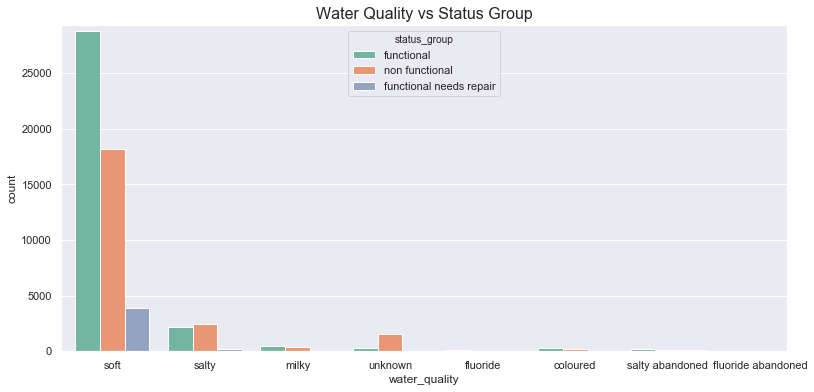

In [65]:
# Let's look at water_quality vs status_group 
plt.figure(figsize=(13,6))
sns.countplot(data=df,x='water_quality',hue='status_group', palette = 'Set2')
plt.title('Water Quality vs Status Group', fontsize=16)
plt.margins(0.02)
df.water_quality.value_counts(normalize=True) * 100

iringa           8.912458
shinyanga        8.387205
mbeya            7.809764
kilimanjaro      7.372054
morogoro         6.744108
arusha           5.639731
kagera           5.582492
mwanza           5.222222
kigoma           4.740741
ruvuma           4.444444
pwani            4.436027
tanga            4.287879
dodoma           3.705387
singida          3.523569
mara             3.314815
tabora           3.297980
rukwa            3.043771
mtwara           2.912458
manyara          2.664983
lindi            2.602694
dar es salaam    1.355219
Name: region, dtype: float64

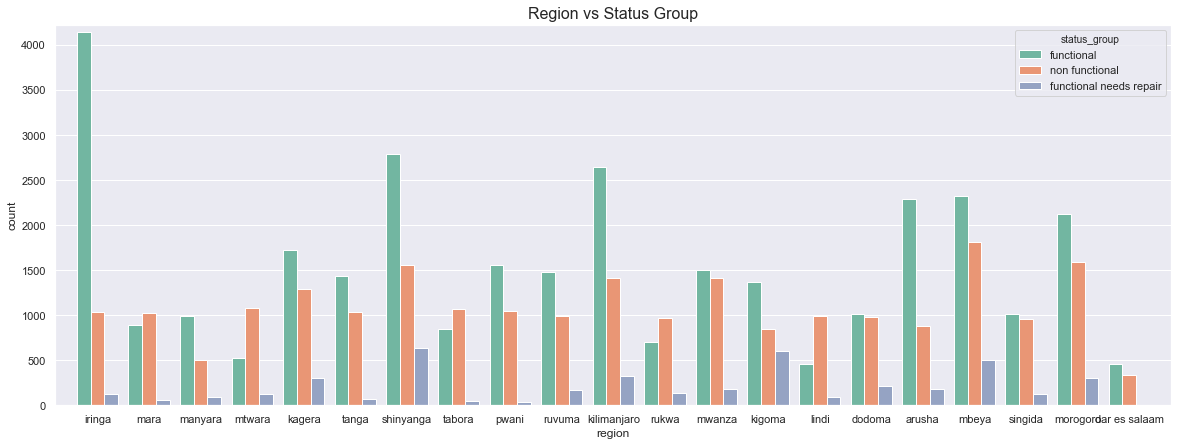

In [66]:
# Let's look at regions vs status group
plt.figure(figsize=(20, 7))
sns.countplot(data=df, x='region', hue='status_group', palette = 'Set2')
plt.title('Region vs Status Group',fontsize=16)
plt.margins(0.02)
df.region.value_counts(normalize=True) * 100

vwc                 68.193603
wug                 10.968013
water board          4.937710
wua                  4.267677
private operator     3.318182
parastatal           2.976431
water authority      1.521886
other                1.420875
company              1.153199
unknown              0.944444
other - school       0.166667
trust                0.131313
Name: management, dtype: float64

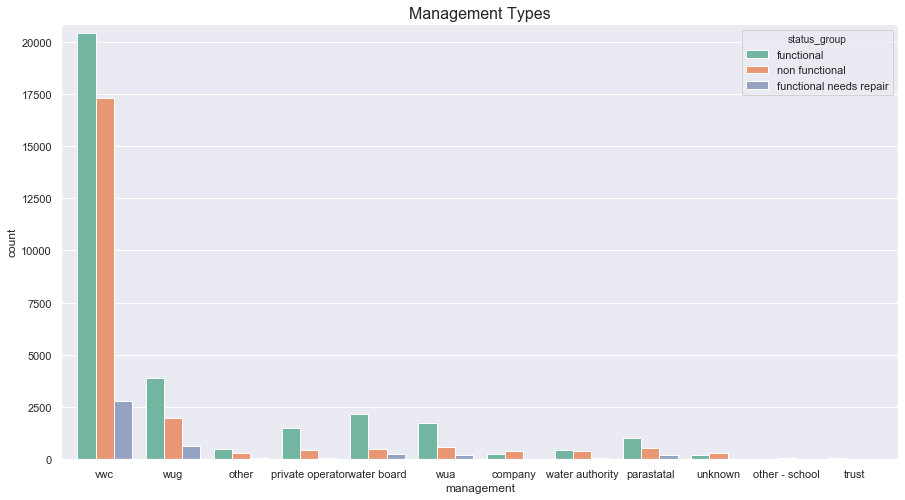

In [67]:
# Let's look at management types
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='management', hue='status_group',palette = 'Set2')
plt.title('Management Types',fontsize=16)
plt.margins(0.02)
df.management.value_counts(normalize=True) * 100

gravity         45.084175
handpump        27.703704
other           10.824916
submersible     10.402357
motorpump        5.028620
rope pump        0.759259
wind-powered     0.196970
Name: extraction_type_class, dtype: float64

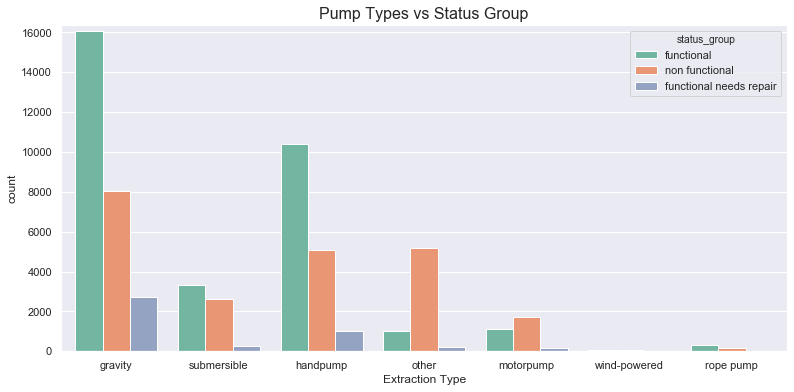

In [68]:
# Let's look at the types of pumps
plt.figure(figsize=(13,6))
sns.countplot(data=df, x='extraction_type_class', hue='status_group', palette = 'Set2')
plt.xlabel('Extraction Type')
plt.title('Pump Types vs Status Group',fontsize=16)
plt.margins(0.02)
df.extraction_type_class.value_counts(normalize=True) * 100

functional                 54.308081
non functional             38.424242
functional needs repair     7.267677
Name: status_group, dtype: float64

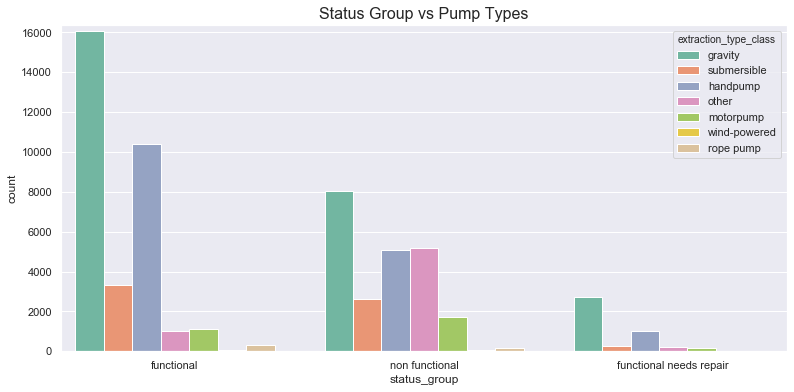

In [69]:
# Let's switch the status_group and extraction_type_class in x and hue
plt.figure(figsize=(13,6))
sns.countplot(data=df, x='status_group',hue='extraction_type_class', palette = 'Set2')
plt.title('Status Group vs Pump Types',fontsize=16)
plt.margins(0.02)
df.status_group.value_counts(normalize=True) * 100

gravity         45.084175
handpump        27.703704
other           10.824916
submersible     10.402357
motorpump        5.028620
rope pump        0.759259
wind-powered     0.196970
Name: extraction_type_class, dtype: float64

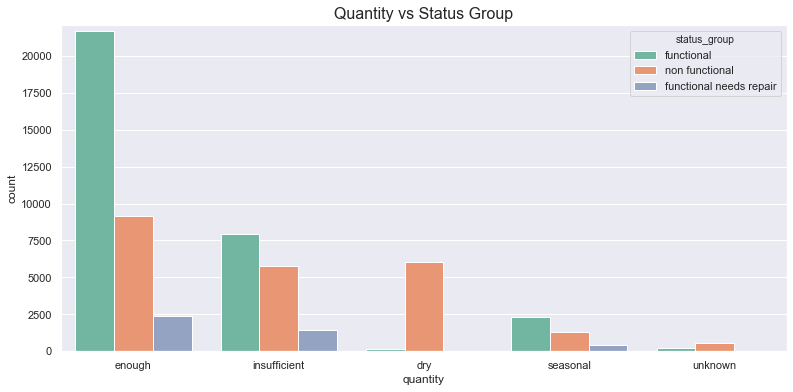

In [70]:
# Let's look at the quantity and status_group
plt.figure(figsize=(13,6))
sns.countplot(data=df,x='quantity',hue='status_group', palette = 'Set2')
plt.title('Quantity vs Status Group',fontsize=16)
plt.margins(0.02)
df.extraction_type_class.value_counts(normalize=True) * 100

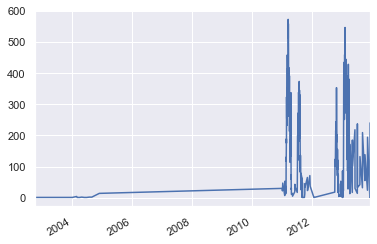

In [71]:
#look at water pump recorded over years as well as the age
df['date_recorded'].value_counts().sort_index().plot()

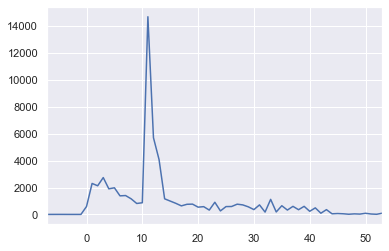

In [72]:
df['pump_age'].value_counts().sort_index().plot()

In [73]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

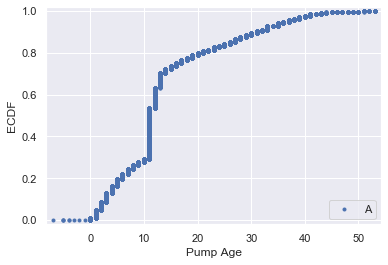

In [74]:
# Compute ECDF of Pump Age
x_age, y_age = ecdf(df.pump_age)

# Plot the ECDFs
_ = plt.plot(x_age, y_age, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('Pump Age')
_ = plt.ylabel('ECDF')
_ = plt.legend(('Age'), loc='lower right')

# Show the plot
plt.show()

In [76]:
pd.DataFrame.to_csv(df, "data/cleaned_df_v2.csv", index=False)